In [164]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

In [165]:
df_teams=pd.read_csv('final_data.csv')
df_teams.head()

,year,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,...,arena_Quicken Loans Arena,arena_Rose Garden Arena,arena_Staples Center,arena_Target Center,arena_The Palace of Auburn Hills,arena_Time Warner Cable Arena,arena_Toyota Center,arena_UIC Pavilion,arena_US Airways Center,arena_Verizon Center
0,9,7,0,-1,-1,-1,895,2258,542,725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,2,1,0,-1,-1,1089,2428,569,755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,0,-1,-1,-1,812,1903,431,577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,1,1,1,0,746,1780,410,528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2,1,0,-1,-1,770,1790,490,663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
def train_evaluate_decision_tree(data, year_range, target_col="playoff"):
    accuracy_scores = []
    precision_scores = []
    years_tested = []

    for i in range(1, len(year_range) - 1):
        train_data = data[data["year"].isin(year_range[:i + 1])]
        test_data = data[data["year"] == year_range[i + 1]]

        X_train = train_data.drop(target_col, axis=1)
        y_train = train_data[target_col]
        X_test = test_data.drop(target_col, axis=1)
        y_test = test_data[target_col]

        # Create and train the decision tree model
        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        years_tested.append(year_range[i + 1])

    return years_tested, accuracy_scores, precision_scores

In [167]:
year_range = sorted(df_teams["year"].unique())
print(year_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [168]:
years_tested, accuracy_scores, precision_scores = train_evaluate_decision_tree(df_teams,year_range)
accuracy_scores, precision_scores

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

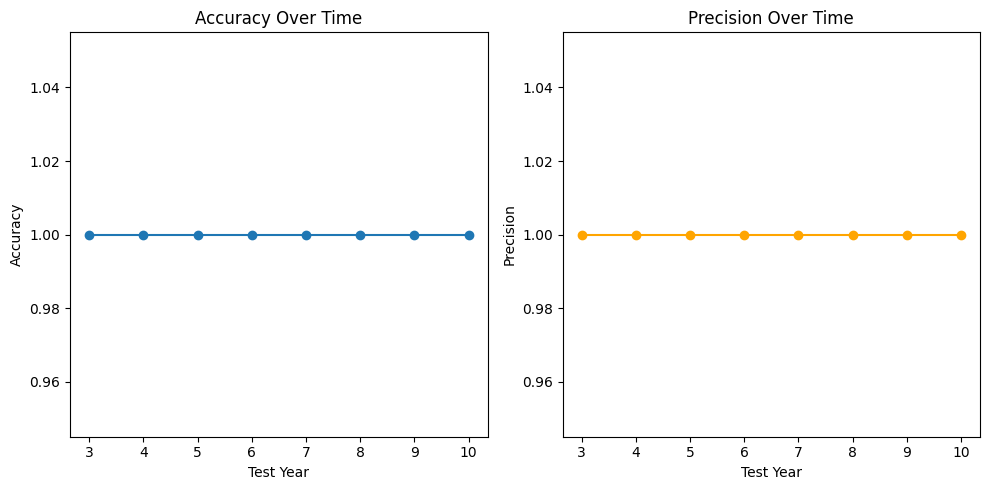

In [169]:
# Create a graph to plot accuracy and precision over time
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(years_tested, accuracy_scores, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Test Year')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(1, 2, 2)
plt.plot(years_tested, precision_scores, marker='o', color='orange')
plt.title('Precision Over Time')
plt.xlabel('Test Year')
plt.ylabel('Precision')

plt.tight_layout()
plt.show()